https://deepai.org/datasets

https://datasetsearch.research.google.com/

https://www.kaggle.com/datasets

https://datasearch.gesis.org/search

https://ukdataservice.ac.uk/

https://msropendata.com/

https://www.re3data.org/search

In [4]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import h5py
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import zipfile
#from google.colab.patches import cv2_imshow

In [6]:
class_cats_folder = 'cats_and_dogs_small/cats'
class_dogs_folder = 'cats_and_dogs_small/dogs'

X = []  # Images
Y = []  #classes

## Cargar en X y Y

In [7]:
list(enumerate([class_cats_folder, class_dogs_folder]))

[(0, 'cats_and_dogs_small/cats'), (1, 'cats_and_dogs_small/dogs')]

In [8]:
for class_label, folder_path in enumerate([class_cats_folder, class_dogs_folder]):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg')):
            file_path = os.path.join(folder_path, filename)
            image = cv2.imread(file_path)
            image = cv2.resize(image, (150, 150))
            if image is not None:
                X.append(image)
                Y.append(class_label)

In [9]:
print(type(X), type(Y))
print(len(X), len(Y))

<class 'list'> <class 'list'>
4000 4000


## Aleatorizar

In [10]:
X = np.array(X)
Y = np.array(Y)

shuffle_indices = np.arange(len(X))
np.random.shuffle(shuffle_indices)

X = X[shuffle_indices]
Y = Y[shuffle_indices]
print(X.shape, Y.shape)

(4000, 150, 150, 3) (4000,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(2400, 150, 150, 3) (2400,)
(800, 150, 150, 3) (800,)
(800, 150, 150, 3) (800,)


# Using h5 file

In [12]:
list(enumerate([class_cats_folder, class_dogs_folder]))

[(0, 'cats_and_dogs_small/cats'), (1, 'cats_and_dogs_small/dogs')]

## Read .jpg files and store it into h5 file in randomnized way

In [13]:
output_hdf5 = "dataset.h5"

# Initialize the HDF5 file
with h5py.File(output_hdf5, 'w') as hdf5_file:
  # Create datasets for images and labels
  image_dataset = hdf5_file.create_dataset("images", (4000, 150, 150, 3), dtype='uint8')
  label_dataset = hdf5_file.create_dataset("labels", (4000,), dtype='int')

  # Create lists to keep track of the order of images
  #image_indices = list(range(4000))
  image_indices = np.arange(4000)

  # Shuffle the order in which images will be added
  #random.shuffle(image_indices)
  np.random.shuffle(image_indices)

  # Function to add image and label to the dataset
  def add_image(image, label, index):
      image_dataset[index] = image
      label_dataset[index] = label

  i = 0
  for class_label, folder_path in enumerate([class_cats_folder, class_dogs_folder]):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg')):
            file_path = os.path.join(folder_path, filename)
            image = cv2.imread(file_path)
            image = cv2.resize(image, (150, 150))

            if image is not None:
              index = image_indices[i]
              add_image(image, class_label, index)
              print('Saved image', i, 'to h5 file in', index, 'position')
              i+=1

Saved image 0 to h5 file in 1241 position
Saved image 1 to h5 file in 3162 position
Saved image 2 to h5 file in 2090 position
Saved image 3 to h5 file in 471 position
Saved image 4 to h5 file in 2979 position
Saved image 5 to h5 file in 2031 position
Saved image 6 to h5 file in 3458 position
Saved image 7 to h5 file in 2258 position
Saved image 8 to h5 file in 3898 position
Saved image 9 to h5 file in 36 position
Saved image 10 to h5 file in 2864 position
Saved image 11 to h5 file in 2811 position
Saved image 12 to h5 file in 3768 position
Saved image 13 to h5 file in 1498 position
Saved image 14 to h5 file in 2631 position
Saved image 15 to h5 file in 718 position
Saved image 16 to h5 file in 2300 position
Saved image 17 to h5 file in 605 position
Saved image 18 to h5 file in 2978 position
Saved image 19 to h5 file in 744 position
Saved image 20 to h5 file in 1925 position
Saved image 21 to h5 file in 1443 position
Saved image 22 to h5 file in 2614 position
Saved image 23 to h5 file i

## Load the h5 file

In [14]:
with h5py.File("dataset.h5", "r") as hdf5_file:
    images = hdf5_file["images"][:]
    labels = hdf5_file["labels"][:]

print(images.shape, labels.shape)

(4000, 150, 150, 3) (4000,)


In [16]:
cv2.imshow('', images[1])

# Using tf.data dataset

In [18]:
# Define the directories for your two classes
class1_dir = 'cats_and_dogs_small/cats'
class2_dir = 'cats_and_dogs_small/dogs'

# Create lists of file paths
file_paths = []
labels = []

# Class 1 (assuming class 1 images are in class1_dir)
class1_file_paths = [os.path.join(class1_dir, filename) for filename in os.listdir(class1_dir) if filename.endswith('.jpg')]
file_paths.extend(class1_file_paths)
labels.extend([0] * len(class1_file_paths))  # Assign a label (0) for class 1

# Class 2 (assuming class 2 images are in class2_dir)
class2_file_paths = [os.path.join(class2_dir, filename) for filename in os.listdir(class2_dir) if filename.endswith('.jpg')]
file_paths.extend(class2_file_paths)
labels.extend([1] * len(class2_file_paths))  # Assign a label (1) for class 2

# Create a tf.data.Dataset from file paths
dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))


# Define a function to load and preprocess images
def load_and_preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Adjust channels as needed
    image = tf.image.resize(image, (150, 150))  # Resize the image
    # Add any further preprocessing steps here

    return image, label

# Apply the load_and_preprocess_image function to each element in the dataset
dataset = dataset.map(load_and_preprocess_image)

# Optionally shuffle, batch, and prefetch the dataset
dataset = dataset.shuffle(buffer_size=100)

2023-11-17 09:24:05.700036: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-11-17 09:24:05.700187: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-17 09:24:05.700196: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-17 09:24:05.700484: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-17 09:24:05.701266: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [27]:
path = 'dataset_files/'

In [28]:
dataset.save(path)

KeyboardInterrupt: 

In [20]:
loaded_dataset = tf.data.Dataset.load(path)

NotFoundError: /content/saved_data/dataset_spec.pb; No such file or directory

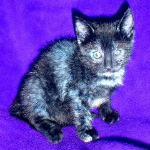

(None, 0)

In [21]:
# Create an iterator for the dataset
iterator = iter(loaded_dataset)

# Get the first element (image) from the dataset
first_image, first_label = next(iterator)

cv2_imshow(first_image.numpy()), first_label.numpy()

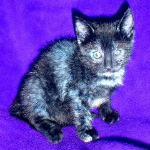

In [22]:
first_element = loaded_dataset.take(1)

# Extract the image and label from the first element
for image, label in first_element:
  cv2_imshow(first_image.numpy()), first_label.numpy()